In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\welcome\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [10]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [11]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [6]:
pip install newsapi-python

Note: you may need to restart the kernel to use updated packages.


In [12]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"
)
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

In [13]:
# Create the Bitcoin sentiment scores DataFrame

In [15]:
#creating the scored data frame then creating a bitcoin data frame 

bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

#reordering the coloums and then dropping the date and displaying the data 
cols = ["compound", "negative", "neutral", "positive", "text", "date"]
bitcoin_df = bitcoin_df[cols]
bitcoin_df = bitcoin_df.drop(columns=['date'])
bitcoin_df.head()

,compound,negative,neutral,positive,text
0,0.3182,0.000,0.909,0.091,Elon Musks cryptocurrency hype was more than j...
1,0.3818,0.000,0.929,0.071,"Tesla, led by Elon Musk, confirmed that it pur..."
2,-0.1027,0.038,0.962,0.000,"For a brief moment on Sunday, before Tesla sai..."
3,0.2500,0.000,0.944,0.056,Twitter and Square CEO Jack Dorsey and rapper ...
4,0.6597,0.000,0.863,0.137,"Today in an SEC filing, Tesla disclosed that i..."


In [16]:
#doing the same as above but for ethereum

In [17]:
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
ethereum_df = pd.DataFrame(ethereum_sentiments)
cols = ["compound", "negative", "neutral", "positive", "text", "date"]
ethereum_df = ethereum_df[cols]
ethereum_df = ethereum_df.drop(columns=['date'])
ethereum_df.head()

,compound,negative,neutral,positive,text
0,-0.3400,0.119,0.818,0.063,Worried that the GeForce RTX 3060 will be sold...
1,-0.4588,0.145,0.789,0.066,NFTs are the latest cryptocurrency rage these ...
2,0.4404,0.000,0.909,0.091,NFTs (non-fungible tokens) — or scarce digital...
3,0.0258,0.000,0.970,0.030,While the first Christie's auction of digital ...
4,0.7096,0.000,0.856,0.144,Attempting to get ahead of cryptocurrency mine...


In [18]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,negative,neutral,positive
count,94.000000,94.000000,94.000000,94.000000
mean,0.183196,0.021426,0.901872,0.066043
std,0.354427,0.052181,0.125229,0.066057
min,-0.906200,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.857750,0.000000
50%,0.102700,0.000000,0.929000,0.057500
75%,0.440400,0.000000,0.993250,0.102500
max,0.851900,0.326000,1.000000,0.260000


In [19]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,negative,neutral,positive
count,91.000000,91.000000,91.000000,91.000000
mean,0.175993,0.029000,0.899571,0.071429
std,0.408942,0.049547,0.077106,0.072576
min,-0.709600,0.000000,0.667000,0.000000
25%,0.000000,0.000000,0.852000,0.000000
50%,0.177900,0.000000,0.909000,0.066000
75%,0.526700,0.061000,0.956500,0.114000
max,0.900100,0.160000,1.000000,0.333000


In [20]:
#Questions:
#Q: Which coin had the highest mean positive score?A: Bitcoin
#Q: Which coin had the highest compound score?A: Bitcoin 
#Q. Which coin had the highest positive score?A: Bitcoin 



In [21]:
# 2. Natural Language Processing
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [22]:
lemmatizer = WordNetLemmatizer()

In [23]:
# Expand the default stopwords list if necessary
print(stopwords.words('english'))
sw_addons = {'also', 'since', 'youve'}

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [24]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addons)]
    return tokens

In [25]:
# Create a new tokens column for Bitcoin
bitcoin_df['tokens'] = bitcoin_df['text'].apply(tokenizer)
bitcoin_df.head()

,compound,negative,neutral,positive,text,tokens
0,0.3182,0.000,0.909,0.091,Elon Musks cryptocurrency hype was more than j...,"[elon, musks, cryptocurrency, hype, wa, idle, ..."
1,0.3818,0.000,0.929,0.071,"Tesla, led by Elon Musk, confirmed that it pur...","[tesla, led, elon, musk, confirmed, purchased,..."
2,-0.1027,0.038,0.962,0.000,"For a brief moment on Sunday, before Tesla sai...","[brief, moment, sunday, tesla, said, invested,..."
3,0.2500,0.000,0.944,0.056,Twitter and Square CEO Jack Dorsey and rapper ...,"[twitter, square, ceo, jack, dorsey, rapper, j..."
4,0.6597,0.000,0.863,0.137,"Today in an SEC filing, Tesla disclosed that i...","[today, sec, filing, tesla, disclosed, ha, acq..."


In [26]:
# Create a new tokens column for Ethereum
ethereum_df['tokens'] = ethereum_df['text'].apply(tokenizer)
ethereum_df.head()

,compound,negative,neutral,positive,text,tokens
0,-0.3400,0.119,0.818,0.063,Worried that the GeForce RTX 3060 will be sold...,"[worried, geforce, rtx, sold, cryptocurrency, ..."
1,-0.4588,0.145,0.789,0.066,NFTs are the latest cryptocurrency rage these ...,"[nfts, latest, cryptocurrency, rage, day, band..."
2,0.4404,0.000,0.909,0.091,NFTs (non-fungible tokens) — or scarce digital...,"[nfts, nonfungible, token, scarce, digital, co..."
3,0.0258,0.000,0.970,0.030,While the first Christie's auction of digital ...,"[first, christies, auction, digital, artwork, ..."
4,0.7096,0.000,0.856,0.144,Attempting to get ahead of cryptocurrency mine...,"[attempting, get, ahead, cryptocurrency, miner..."


In [27]:
# NGrams and Frequency Analysis

In [28]:
from collections import Counter
from nltk import ngrams

In [33]:
# Generate the Bitcoin N-grams where N=2
bitcoin_text = ' '.join(bitcoin_df.text)
bitcoin_processed = tokenizer(bitcoin_text)
bitcoin_ngrams = Counter(ngrams(bitcoin_processed, n=2))
print(dict(bitcoin_ngrams.most_common(10)))

{('char', 'reuters'): 25, ('virtual', 'currency'): 11, ('reuters', 'stafffile'): 10, ('stafffile', 'photo'): 10, ('illustration', 'taken'): 10, ('reuters', 'bitcoin'): 10, ('record', 'high'): 9, ('billion', 'bitcoin'): 8, ('elon', 'musk'): 6, ('tesla', 'inc'): 6}


In [34]:
# Generate the Ethereum N-grams where N=2
ethereum_text = ' '.join(ethereum_df.text)
ethereum_processed = tokenizer(ethereum_text)
ethereum_ngrams = Counter(ngrams(ethereum_processed, n=2))
print(dict(ethereum_ngrams.most_common(10)))

{('char', 'reuters'): 16, ('record', 'high'): 12, ('feb', 'reuters'): 9, ('char', 'new'): 9, ('new', 'york'): 9, ('reuters', 'stafffile'): 8, ('stafffile', 'photo'): 8, ('char', 'dollar'): 7, ('reuters', 'bitcoin'): 7, ('graphic', 'world'): 7}


In [35]:
  # Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [36]:
# Get the top 10 words for Bitcoin
bitcoin_top10 = token_count(bitcoin_processed)
bitcoin_top10

[('char', 91), ('bitcoin', 74), ('reuters', 47)]

In [37]:
 # Get the top 10 words for Ethereum
ethereum_top10 = token_count(ethereum_processed)
ethereum_top10

[('char', 91), ('reuters', 46), ('bitcoin', 37)]

In [38]:
#Word Clouds

In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [43]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


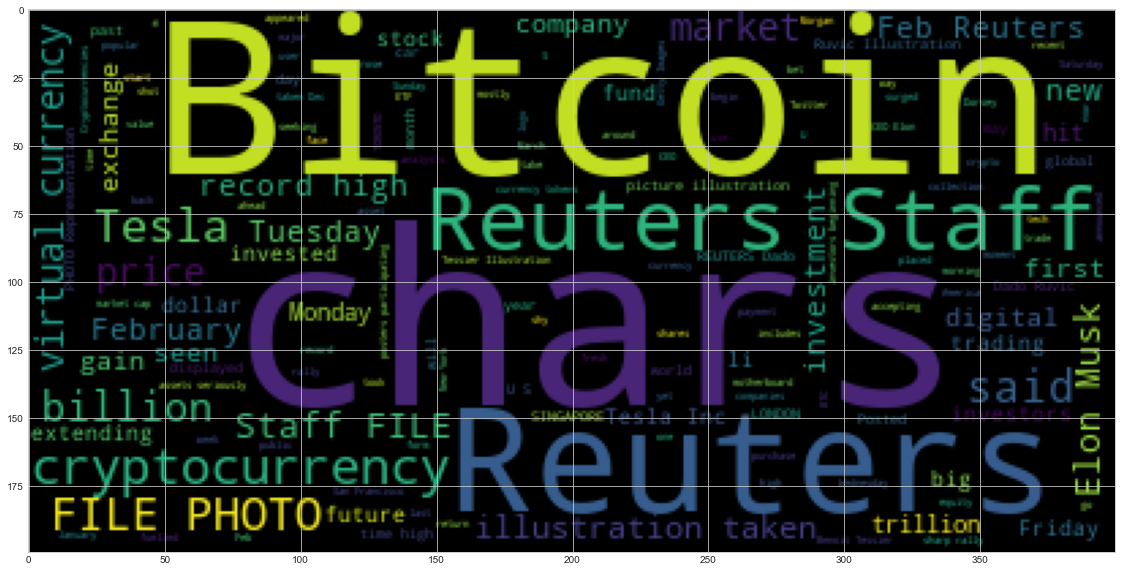

In [44]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(bitcoin_text)
plt.imshow(wc)

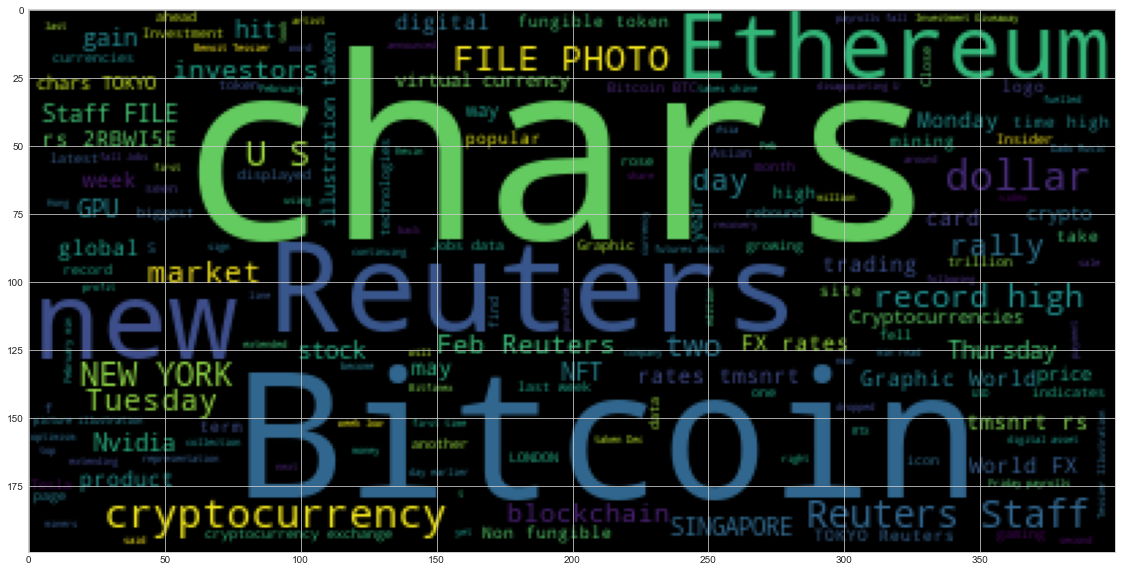

In [45]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(ethereum_text)
plt.imshow(wc)

In [49]:
#Named Entity Recognition
import spacy
from spacy import displacy

In [50]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [51]:
!python -m spacy download en_core_web_sm

2021-03-07 23:19:26.491135: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-03-07 23:19:26.491469: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.



[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [52]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

In [53]:
# Bitcoin NER

In [54]:
# Concatenate all of the Bitcoin text together
bitcoin_text = ' '.join(bitcoin_df.text)
bitcoin_text # wish there was a way not to show it all 

'Elon Musks cryptocurrency hype was more than just idle talk. CNBCreports that Tesla not only bought $1.5 billion worth of Bitcoin to help diversify and maximize its returns, but will start taking pay… [+1182 chars] Tesla, led by Elon Musk, confirmed that it purchased about $ 1.5 billion in bitcoin in January and expects to start accepting it as a payment in the future.\xa0 | Photo by Artur Widak/NurPhoto via Getty… [+6118 chars] For a brief moment on Sunday, before Tesla said it had invested $1.5 billion in bitcoin and planned to let people use the cryptocurrency to pay for its cars, bitcoins price could be expressed with a … [+3302 chars] Twitter and Square CEO Jack Dorsey and rapper Jay Z have created an endowment to fund bitcoin development initially in Africa and India, Dorsey said Friday.\r\nThe duo is putting 500 bitcoin, which is … [+3984 chars] Today in an SEC filing, Tesla disclosed that it has acquired $1.5 billion in bitcoin, the popular cryptocurrency. Moreover, the compan

In [56]:
bitcoin_doc = nlp(bitcoin_text)

# Add a title to the document
bitcoin_doc.user_data["title"] = "Bitcoin NER"
# Render the visualization
displacy.render(bitcoin_doc, style='ent')

In [57]:
# List all Entities
for ent in bitcoin_doc.ents:
    print(ent.text + ' ' + ent.label_)

Tesla ORG
$1.5 billion MONEY
Elon Musk PERSON
about $ 1.5 billion MONEY
January DATE
Artur ORG
Widak PRODUCT
NurPhoto ORG
Sunday DATE
Tesla ORG
$1.5 billion MONEY
Jack Dorsey PERSON
Jay Z PERSON
Africa LOC
India GPE
Dorsey ORG
Friday DATE
500 CARDINAL
Today DATE
SEC ORG
Tesla ORG
$1.5 billion MONEY
first ORDINAL
more than a decade later DATE
Coinbase NORP
San Francisco GPE
last year DATE
Thursday DATE
Feb. 9, 2021 DATE
8:01 a.m. TIME
Feb. 9, 2021 DATE
8:01 a.m. TIME
Bitcoin PERSON
Teslas PERSON
Monday DATE
1.5 MONEY
this morning TIME
over $50,000 MONEY
Francis Suarez PERSON
Jack Dorsey PERSON
Jay Z PERSON
Datadog ORG
Startup Battlefield ORG
BuzzFeed ORG
AI ORG
Daily Crunch WORK_OF_ART
February 12, 2021 DATE
Bitcoins PERSON
recent weeks DATE
Friday DATE
over $12,000 MONEY
New York GPE
CNN ORG
above $58,000 MONEY
Sunday DATE
just above $46,000 MONEY
Tuesday DATE
6 CARDINAL
Alabamas PERSON
Richard Shelby PERSON
next year DATE
Shelby PERSON
86 DATE
seventh ORDINAL
DoorDash ORG
Tesla ORG
Da

In [58]:
# Concatenate all of the Ethereum text together
ethereum_text = ' '.join(ethereum_df.text)
ethereum_text

'Worried that the GeForce RTX 3060 will be sold out as cryptocurrency miners snap up every GPU in sight? NVIDIA thinks it has a simple way to help: make the new card unattractive to the crypto crowd. … [+1652 chars] NFTs are the latest cryptocurrency rage these days, with bands like Kings of Leon releasing their next album as limited edition "golden tickets," and NBA digital collectibles being sold for millions … [+7287 chars] NFTs (non-fungible tokens) — or scarce digital content represented as tokens — are driving a new wave of crypto adoption.\r\nThanks to the Ethereum blockchain, artists, gaming companies and content cre… [+5365 chars] While the first Christie\'s auction of digital artwork backed by NFT (non-fungible token) is still a few days away, one of the most notable sales in that world has already taken place. Chris Torres cr… [+1064 chars] Attempting to get ahead of cryptocurrency miners who might snatch up a good chunk of RTX 3060 stock when the GPU goes on sale next week,

In [60]:
#same thing but for Ethereum this time

# Run the NER processor on all of the text
ethereum_doc = nlp(ethereum_text)
# Add a title to the document
ethereum_doc.user_data["title"] = "Ethereum NER"
# Render the visualization
displacy.render(ethereum_doc, style='ent')

In [62]:
# List all Entities
for ent in ethereum_doc.ents:
    print(ent.text + ' ' + ent.label_)

GeForce ORG
3060 GPE
GPU ORG
these days DATE
Kings PERSON
NBA ORG
millions CARDINAL
Ethereum ORG
first ORDINAL
Christie's ORG
NFT ORG
a few days DATE
Chris Torres PERSON
3060 DATE
GPU ORG
next week DATE
Nvidia PERSON
this morning TIME
Reuters ORG
SINGAPORE GPE
Feb 9 DATE
Reuters ORG
Asia LOC
Tuesday DATE
Tesla Inc ORG
Reuters ORG
FILE PERSON
Bitcoin PERSON
Marseille GPE
France GPE
February 7, 2021 DATE
Eric Gaillard PERSON
SINGAPORE PERSON
Reuters ORG
NEW YORK GPE
Reuters ORG
second ORDINAL
Thursday DATE
NEW YORK GPE
Feb 18 DATE
Reuters ORG
second ORDINAL
Thursday DATE
Friday DATE
7.34% PERCENT
the week ending 21st February DATE
11.65% PERCENT
the previous week DATE
Ethereum ended ORG
the week DATE
1,935.57 MONEY
the week DATE
Coinbase NORP
San Francisco GPE
last year DATE
Thursday DATE
Bitfinex ORG
Bitfinex ORG
NEW YORK GPE
Reuters ORG
$245 million MONEY
last week DATE
80% PERCENT
Reuters ORG
SINGAPORE PERSON
Reuters ORG
Asian NORP
Saturday DATE
two-month DATE
$1 trillion MONEY
a day 